### This is a replication of the [model](https://www.researchgate.net/publication/262218039_Optimization_in_self-modeling_complex_adaptive_systems).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import powerlaw as POW
from tqdm import tqdm
import multiprocessing
from multiprocessing import Pool
from timeit import default_timer as timer
#import seaborn as sns
from Hopp.functions import *
from Evo.Basic_activations import *
from scipy.spatial import distance
import networkx as nx

In [2]:
def get_degrees(w):
    #w_1=np.copy(w)
    graph=nx.from_numpy_array(w)
    degrees=graph.degree()
    sort_pos=sorted(degrees, key=lambda x:x[1], reverse=True)
    return graph, degrees, sort_pos
    

In [3]:
end_point_list=[]
energy=[]
state_list=[]
N=150
num_relaxations=2000
relaxation=10*N
num_iterations=num_relaxations*relaxation
weights=np.heaviside(np.random.choice(2, N*N),-1)
weights=weights.reshape(N, N)
weights=(weights+weights.T)/2
np.fill_diagonal(weights, 0)
weights_original=np.copy(weights)
state_1=Generate_state(N)
for i in tqdm(range(num_iterations)):
    if i%relaxation==0 and i!=0:
        end_point=Binary_energy(state_1, weights_original)
        end_point_list.append(end_point)
        state_list.append(np.copy(state_1))
        state_1=Generate_state(N)
    if i<=num_iterations/2:
        Binary_update(state_1, weights)
        energy.append(Binary_energy(state_1, weights))
    if i>num_iterations/2:
        Binary_update(state_1, weights)
        delta_w=Self_modeling(state_1, 0.00025/500)
        weights+=delta_w

100%|██████████| 3000000/3000000 [02:13<00:00, 22398.79it/s]


Text(0.5, 1.0, 'Energy')

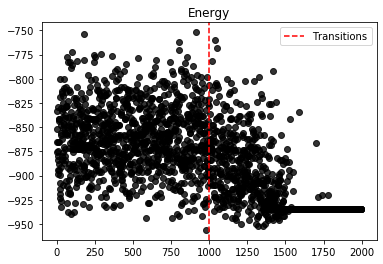

In [4]:
plt.scatter(np.arange(0, len(end_point_list)), end_point_list, color="k", alpha=0.8);
plt.axvline(1000, c="r", linestyle="dashed", label="Transitions");
plt.legend();
plt.title("Energy")
